# 8 신경망-딥러닝의 응용

# 8.1 MNIST 데이터베이스
필기체 숫자 데이셋에는 MNIST라는 데이터베이스를 사용

In [10]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

60000개의 train data

10000개의 test data

**x_train**은 60000x28x28의 배열 변수로, 각 요소는
0~255의 값을 갖는 정수

**y_train**의 각 요소는 0-9의 정수 값

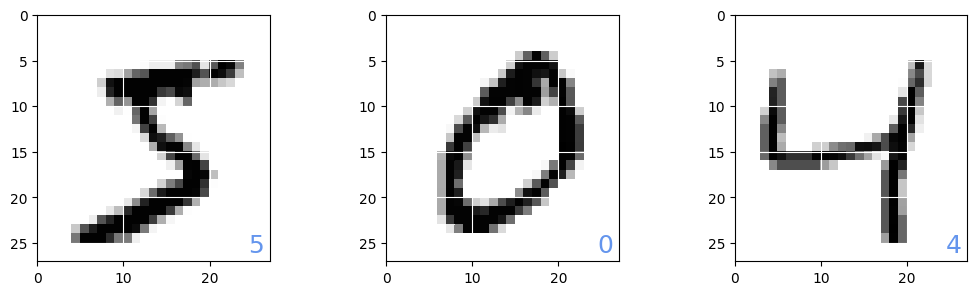

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize = (12, 3.2))
plt.subplots_adjust(wspace = 0.5)
plt.gray()

for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, : :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color = 'cornflowerblue', fontsize = 18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color = 'white')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) # 60000 X 784로 변환
x_train = x_train.astype('float32') # int -> float
x_train = x_train / 255  #  0~1 사이의 값으로 변환

num_classes = 10
y_train = to_categorical(y_train, num_classes) # 1-of-K

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

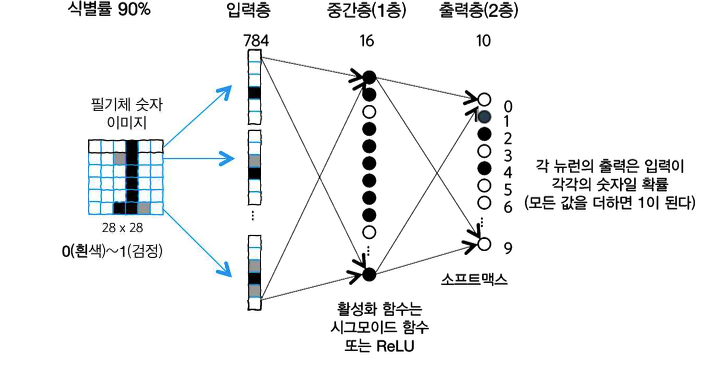

In [13]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # model을 Sequential로 정의
model.add(Dense(16, input_dim=784, activation='sigmoid')) # 784차원 입력을 갖는 16개의 중간층
model.add(Dense(10, activation='softmax')) # 10개의 출력층

model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # 최적화 알고리즘 Adam 설정

In [14]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) # verbose = 1 -> 매 시기의 학습 평가치가 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 3s 39ms/step - loss: 1.9755 - accuracy: 0.4213 - val_loss: 1.6643 - val_accuracy: 0.7079
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 1.4888 - accuracy: 0.7454 - val_loss: 1.3164 - val_accuracy: 0.7959
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 1.2044 - accuracy: 0.8024 - val_loss: 1.0817 - val_accuracy: 0.8330
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.0043 - accuracy: 0.8316 - val_loss: 0.9125 - val_accuracy: 0.8525
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.8590 - accuracy: 0.8484 - val_loss: 0.7892 - val_accuracy: 0.8650
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.7516 - accuracy: 0.8607 - val_loss: 0.6966 - val_accuracy: 0.8738
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6703 - accuracy: 0.8697 - val_loss: 0.6266 - val_accuracy: 0.8809
Epoch 8/10
60/60 

batch size를 지정하여 갱신마다 batch size만큼의 데이터셋에서 계산된 매개 변수가 갱신됨 -> SGD

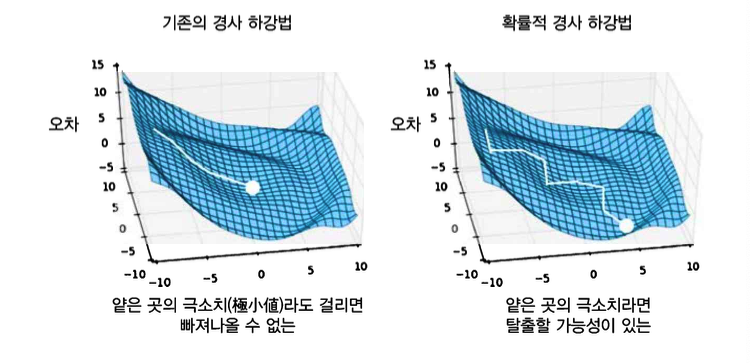

SGD는 local minimum problem 극소해에 빠져도 벗어날 수 있음

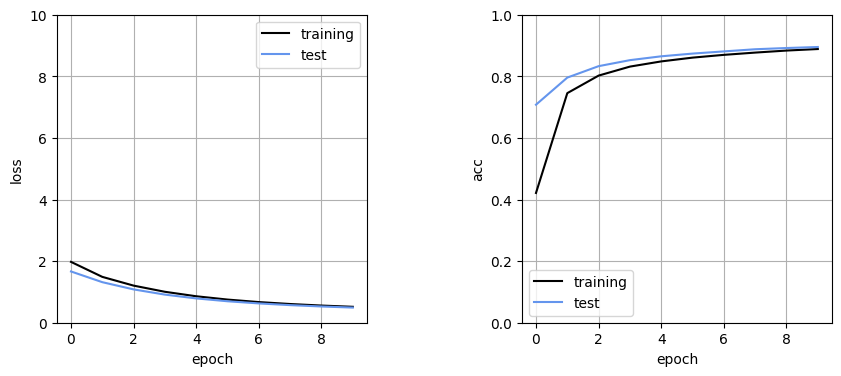

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 1ms/step


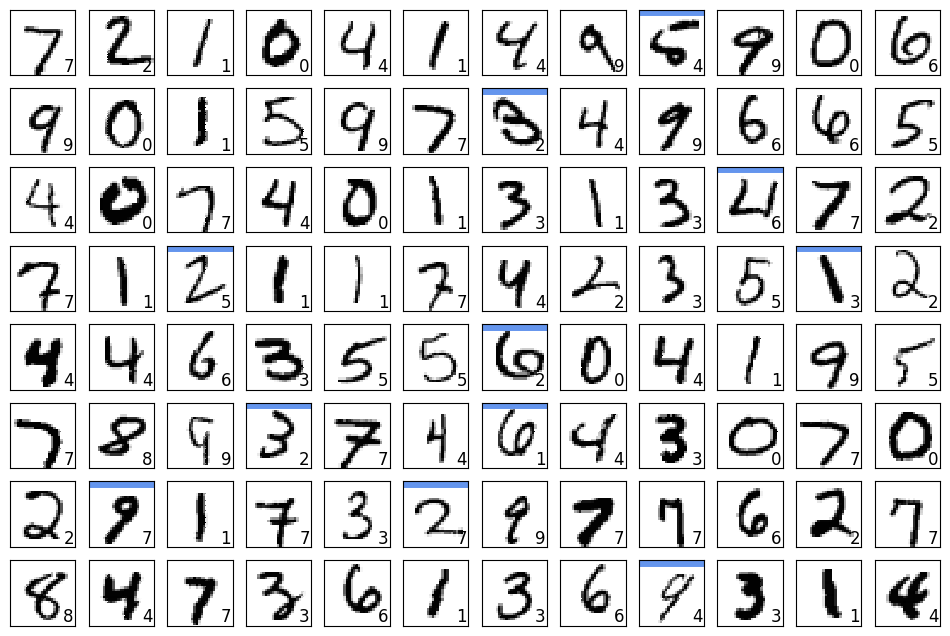

In [17]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # x_test 전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

# 8.3 ReLU 활성화 함수
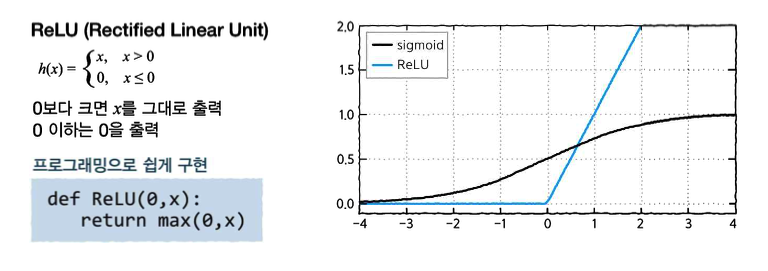

시그모이드 함수는 입력이 커지면 1에 가까운 값을 출력 ->
입력의 변화가 출력에 반영 X -> 편미분이 0에 가까움 -> 학습 딜레이

ReLU 함수는 입력이 양수이면 그대로 출력 -> 변화를 비교적 잘 반영, 계산 빠름

In [18]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A) activation func 를 relu로 변경
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 14ms/step - loss: 1.5912 - accuracy: 0.4970 - val_loss: 0.9372 - val_accuracy: 0.7873
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.6872 - accuracy: 0.8360 - val_loss: 0.5002 - val_accuracy: 0.8713
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 0.4558 - accuracy: 0.8797 - val_loss: 0.3883 - val_accuracy: 0.8949
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3762 - accuracy: 0.8974 - val_loss: 0.3378 - val_accuracy: 0.9043
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3351 - accuracy: 0.9079 - val_loss: 0.3093 - val_accuracy: 0.9119
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3089 - accuracy: 0.9142 - val_loss: 0.2905 - val_accuracy: 0.9159
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2907 - accuracy: 0.9187 - val_loss: 0.2752 - val_accuracy: 0.9213
Epoch 8/10
60/60 [

313/313 [==============================] - 0s 1ms/step


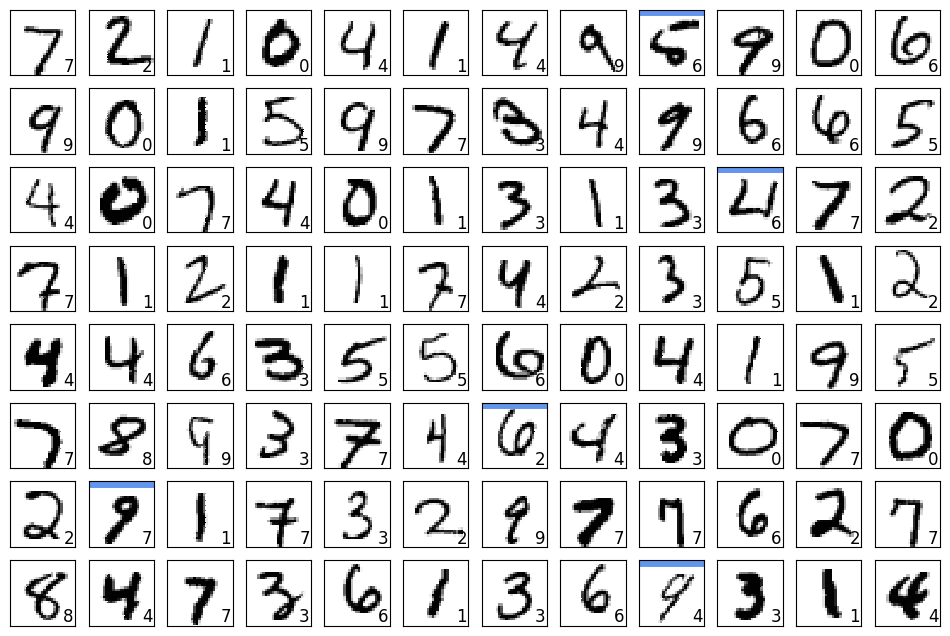

In [19]:
show_prediction()
plt.show()

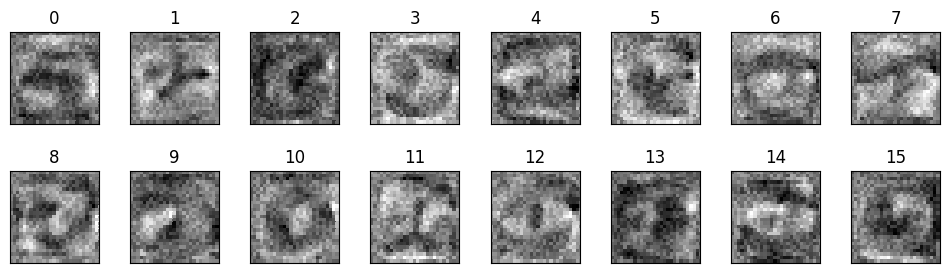

In [20]:
#1층에 대한 시각화
w = model.layers[0].get_weights()[0] # 네트워크 모델의 중간층 가중치 매개변수
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

가중치 값이 양수 -> 검은색

가중치 값이 음수 -> 흰색

검은 부분에 픽셀 존재 -> 활성화

흰 부분에 픽셀 존재 -> 억제

네트워크의 구조는 전결합형, 모든 입력 성분은 대등한 관계

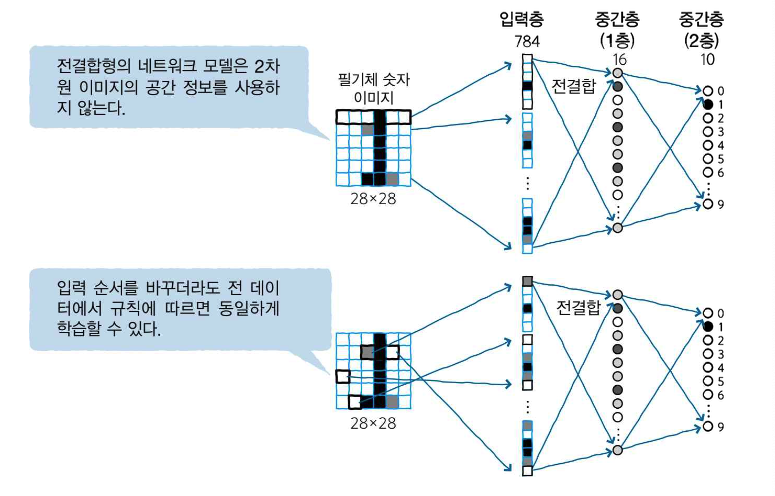

이웃에 있는 입력 = 멀리 떨어진 입력 성분
--> 공간 정보 사용 X

# 8.4 공간 필터
직선, 곡선, 원형, 사각형 형태를 골라 내는 이미지 처리법 -> 공간 필터

필터는 2차원 행렬로 표현

이미지의 일부분과 필터 요소를 곱한 합을, 슬라이드시키면서 이미지 전 구간에
합성곱 연산을 진행

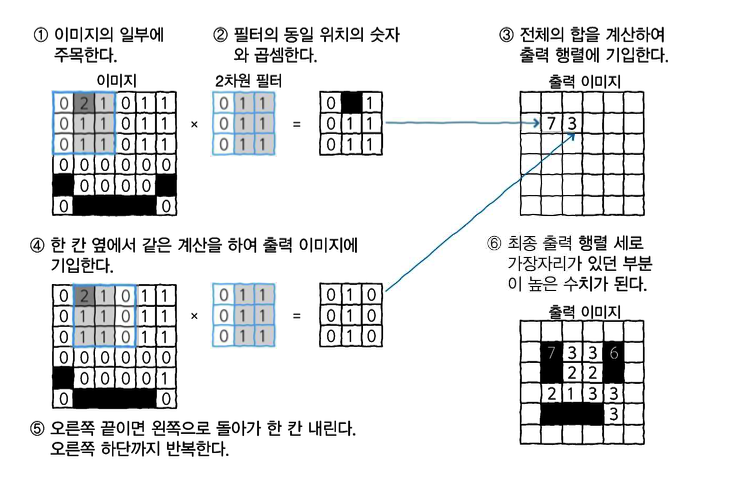

원본 이미지의 위치 (i, j) 픽셀 값을 x(i, j) 3x3 필터를 h(i, j) 라고 할 때, 합성곱연산을 통해 얻어지는 값 g

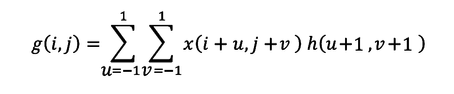

필터는 홀수 너비가 중심을 결정하므로 사용하기 쉬움

In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [22]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

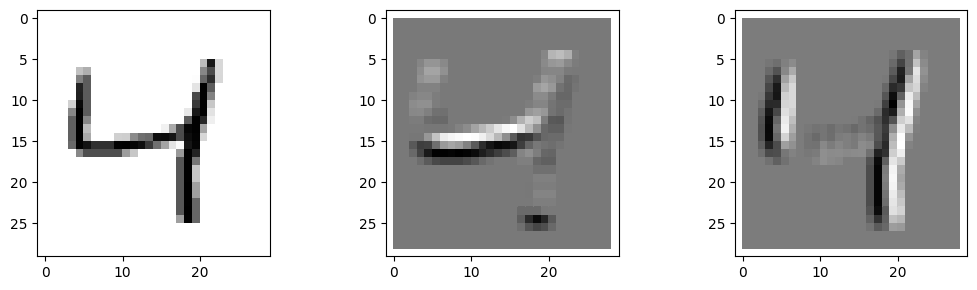

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1))

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

가로와 세로의 엣지를 학습

필터를 적용하면 출력 이미지의 크기가 작아짐
-> 연속으로 다양한 필터 적용시 이미지가 계속 작아짐

대응책으로 패딩 Padding 사용

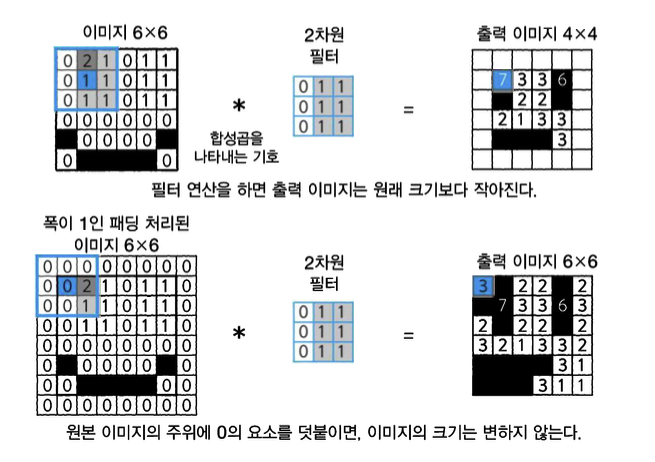

패딩은 필터를 적용하기 전에 0등의 고정된 요소로 주위를 부풀려두는 방법

지금까지의 필터는 한 칸씩 이동했지만 2칸 3칸 어떤 간격으로도 이동 가능

이 간격을 스트라이드 Stride라고 함

스트라이드를 크게 하면 출력 이미지가 작아짐

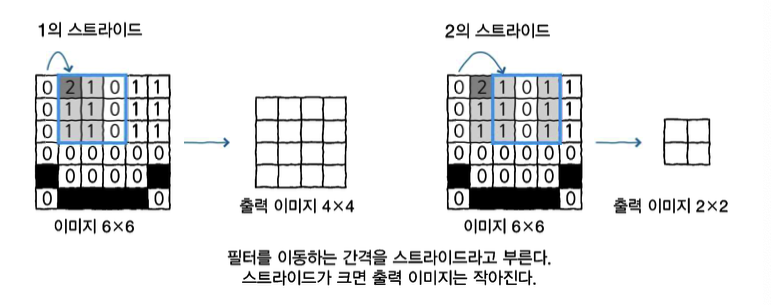

# 8.5 합성곱 신경망
필터를 사용한 신경망을 합성곱 신경망 Convolution Neural Network: CNN이라 함

CNN은 필터 자체를 학습

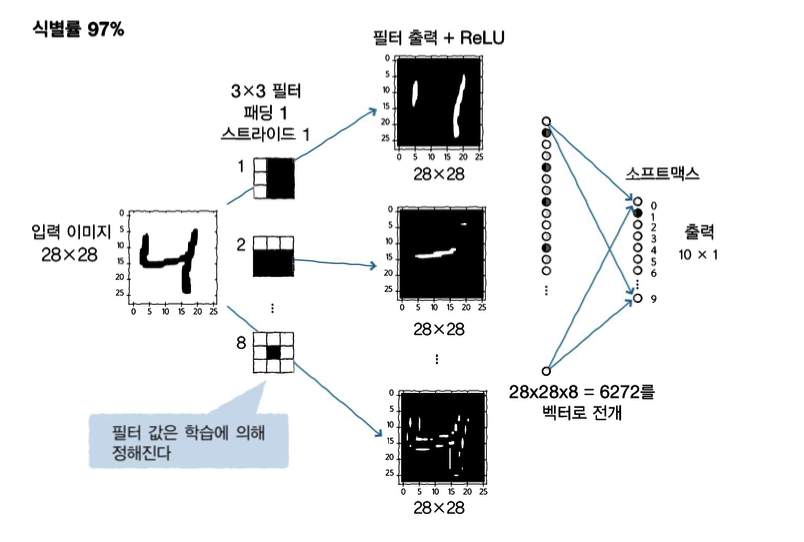

In [24]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

#합성곱층의 출력은 4차원 (배치 수, 필터 수, 출력이미지의 세로, 출력이미지의 가로)
model = Sequential()
# 3x3의 필터를 8개 사용 padding='same' -> 출력 크기가 변하지 않도록
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu')) # 흑백 이미지 -> shape 마지막 인수: 1
model.add(Flatten()) # 합성곱층의 출력을 다음 출력층에 넣기 위해 2차원으로 변환
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 12s 182ms/step - loss: 0.7766 - accuracy: 0.8164 - val_loss: 0.3417 - val_accuracy: 0.9033
Epoch 2/20
60/60 [==============================] - 10s 163ms/step - loss: 0.3210 - accuracy: 0.9092 - val_loss: 0.2810 - val_accuracy: 0.9215
Epoch 3/20
60/60 [==============================] - 11s 181ms/step - loss: 0.2791 - accuracy: 0.9208 - val_loss: 0.2555 - val_accuracy: 0.9290
Epoch 4/20
60/60 [==============================] - 15s 254ms/step - loss: 0.2524 - accuracy: 0.9287 - val_loss: 0.2332 - val_accuracy: 0.9336
Epoch 5/20
60/60 [==============================] - 14s 232ms/step - loss: 0.2300 - accuracy: 0.9346 - val_loss: 0.2153 - val_accuracy: 0.9398
Epoch 6/20
60/60 [==============================] - 11s 191ms/step - loss: 0.2083 - accuracy: 0.9414 - val_loss: 0.2001 - val_accuracy: 0.9414
Epoch 7/20
60/60 [==============================] - 15s 257ms/step - loss: 0.1902 - accuracy: 0.9470 - val_loss: 0.1782 - val_accuracy: 0.9502

In [25]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 [==============================] - 2s 5ms/step


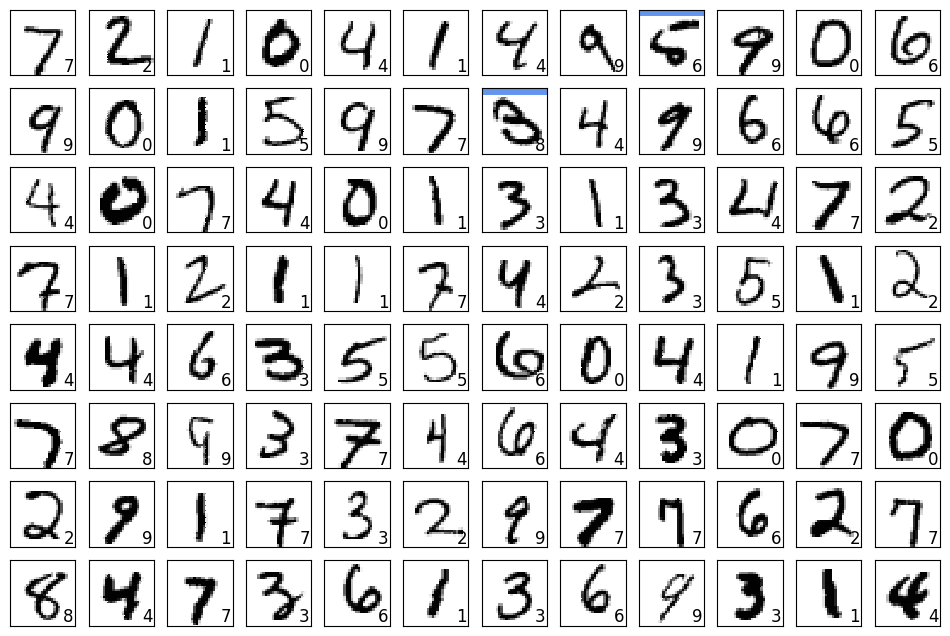

In [26]:
show_prediction()
plt.show()

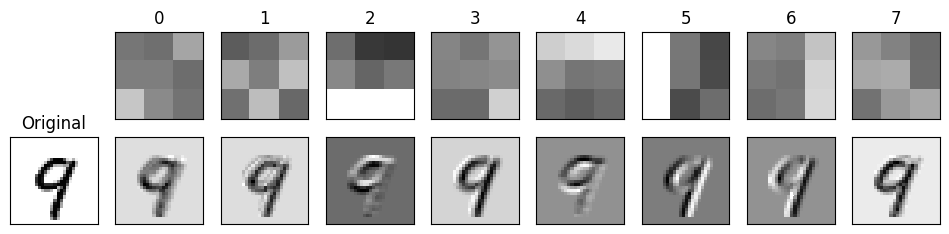

In [27]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)

    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

2층 합성곱 네트워크의 학습에서 얻은 필터와 그 적용 이미지

각각 학습을 통해 얻은 필터를 볼 수 있고, 각 필터를 적용한 이미지는 아래와 같다.

각 필터의 특징들이 알 수 있음

# 8.6 풀링
이미지 인식과 관련해 중요한 것 -> 위치가 어긋남에 대한 견고성

인간의 눈으로는 동일한 입력이라도 네트워크에서는 완전히 다른 패턴으로 인식

-> 해결을 위해 '풀링처리'

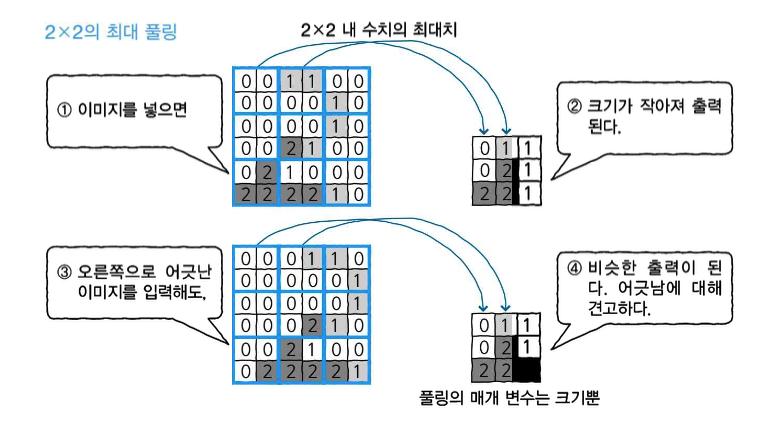

풀링처리를 적용해 얻은 출력 이미지는, 가로 세로로 어긋나도 거의 변하지 않음

최대 풀링 외에 평균 풀링 average pooling이 있음
-> 작은 영역의 수치의 평균을 출력값으로

풀링 스트라이드도 임의로 설정 가능

# 8.7 드롭아웃
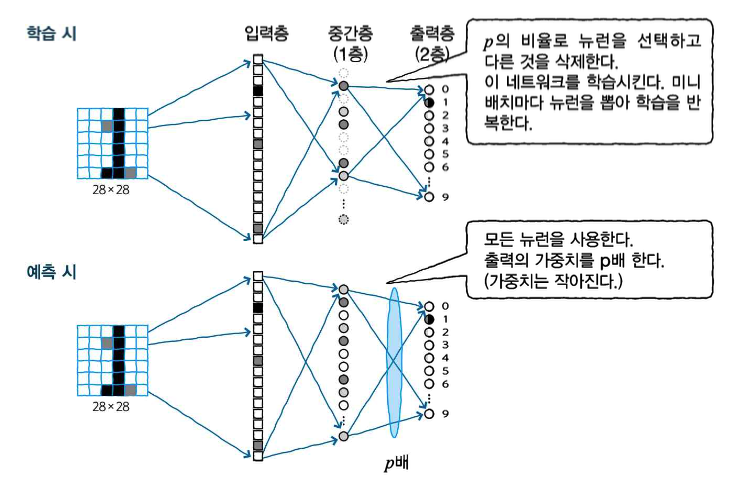

드롭아웃은 학습 시에 입력층의 유닛과 중간층 뉴런을 확률 $p$ $(p<1)$로 임의로 선택, 나머지는 버리는 방법.

버린 뉴런은 제외하고 학습을 갱신. 미니 배치마다 반복

학습 후 예측에서는 모든 뉴런을 사용 -> 학습 시에는 $p$의 비율의 뉴런으로 학습, 예측 시에 출력이 커짐 -> 한 층의 출력 대상의 가중치를 $p$배로 하여 (($0 \leq p\leq 1$)이므로 줄어듬) 작게 설정

드롭아웃은 여러 네트워크를 각각 학습시켜 예측 시에 네트워크를 평균화해 합치는 효과가 있음

# 8.8 MNIST 인식 네트워크 모델

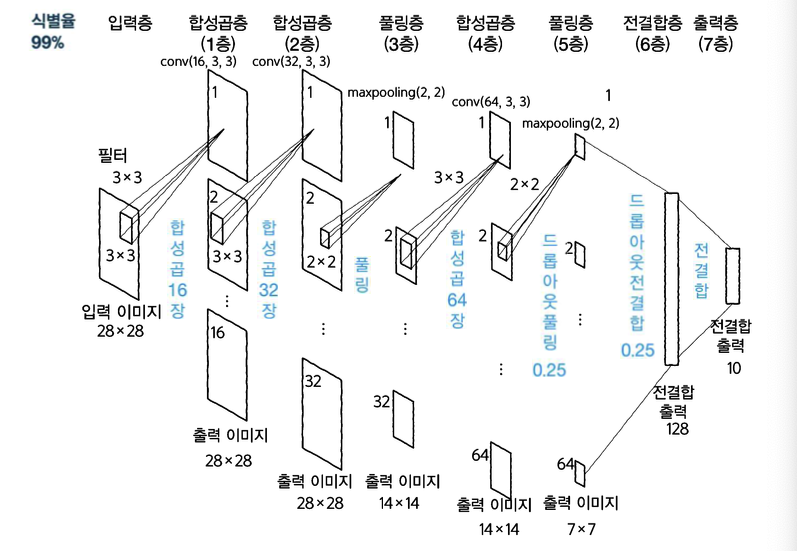

In [28]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 83s 1s/step - loss: 0.7080 - accuracy: 0.7828 - val_loss: 0.1323 - val_accuracy: 0.9584
Epoch 2/20
60/60 [==============================] - 79s 1s/step - loss: 0.1341 - accuracy: 0.9593 - val_loss: 0.0605 - val_accuracy: 0.9803
Epoch 3/20
60/60 [==============================] - 80s 1s/step - loss: 0.0890 - accuracy: 0.9735 - val_loss: 0.0432 - val_accuracy: 0.9860
Epoch 4/20
60/60 [==============================] - 79s 1s/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0357 - val_accuracy: 0.9878
Epoch 5/20
60/60 [==============================] - 80s 1s/step - loss: 0.0562 - accuracy: 0.9832 - val_loss: 0.0310 - val_accuracy: 0.9892
Epoch 6/20
60/60 [==============================] - 80s 1s/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0291 - val_accuracy: 0.9897
Epoch 7/20
60/60 [==============================] - 83s 1s/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 8/20
60/60 [==

313/313 [==============================] - 7s 21ms/step


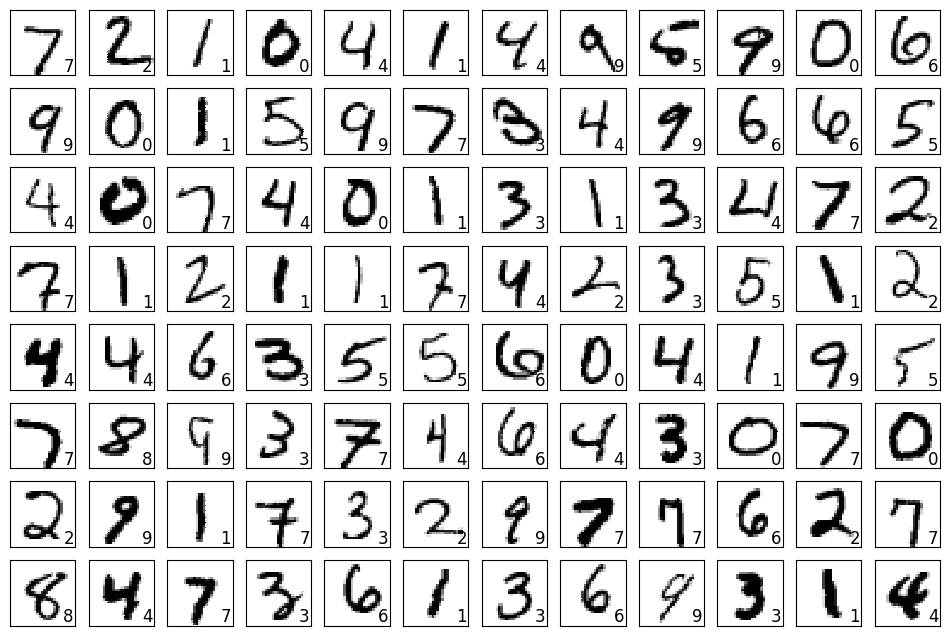

In [29]:
show_prediction()
plt.show()